# Chapter 4: Testing and regularization with Turi Create

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

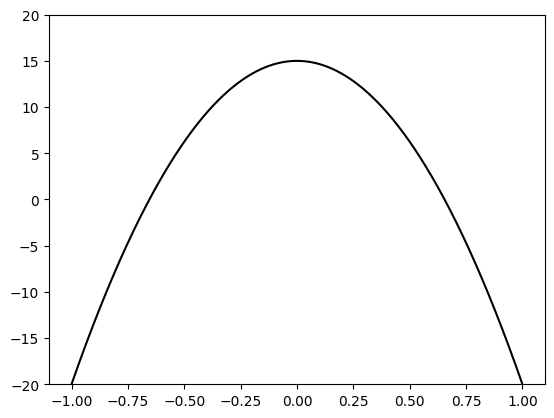

In [2]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [3]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

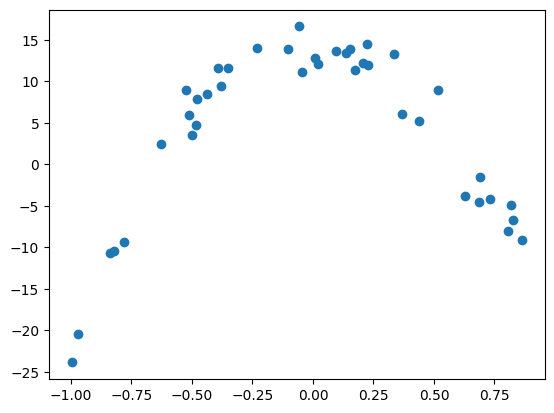

In [4]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [5]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [28]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    X = X.reshape(-1, 1)
    poly = PolynomialFeatures(degree=polyDegree, include_bias=False)
    return poly.fit_transform(X)

X_poly=addPoly(X,200)

In [29]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [33]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test =train_test_split(X_poly, Y, test_size=0.2)

In [34]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

#Q1

## Training a polynomial regression model with no regularization

In [35]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data

model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.5544784430996832
Testing error (rmse): 8822.344571271482


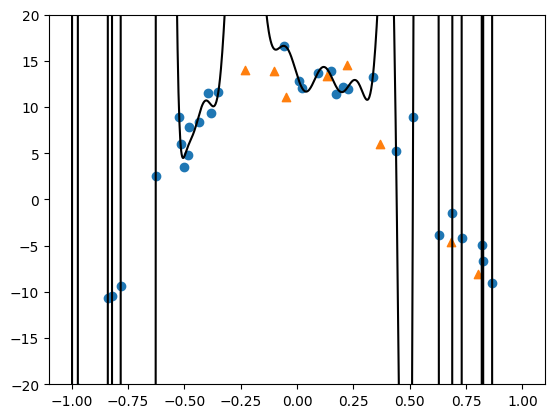

Polynomial coefficients
[13.492944025141764, -77.72115423457772, 349.389367829851, 14362.405295505849, -39503.359669632846, -1015738.8848847011, 2707438.5639864947, 28082365.391428262, -69483996.28479758, -406337765.8827637, 881319508.7436413, 3449967688.5482306, -6275556190.765968, -17724917302.50398, 26217752981.644135, 53536769664.222984, -62673174856.41394, -83309333052.15889, 72320433693.043, 31405203772.148716, -4407609553.952362, 59716761924.69225, -52874573513.68679, -11636467725.30378, -11685067230.518942, -55407303762.95324, 33688690704.902042, -36384223985.33413, 37830142988.788, 7942278211.0131855, 12837065097.973263, 38854414569.48374, -14982829707.631727, 43576096886.214, -30234688446.725883, 28622085195.101776, -30654409786.042667, 6247287589.729724, -20926035568.109867, -13862462934.300772, -7095114159.219749, -26911839841.777267, 6214103082.674214, -32102545047.81404, 16443179979.974962, -30875656208.379932, 22740671140.071568, -25444899312.524418, 25328854579.953762, 

In [36]:
display_results(model_no_reg)

#Q2

## Training a polynomial regression model with L1 regularization

In [41]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg = linear_model.Lasso()

model_L1_reg.fit(X_train, y_train)

Lasso()

Training error (rmse): 4.133967049552677
Testing error (rmse): 3.564751904690887


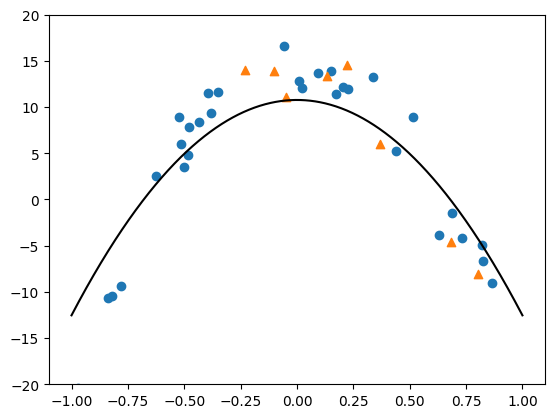

Polynomial coefficients
[10.769537190944078, 0.0, -23.30741923983996, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -

In [42]:
display_results(model_L1_reg)

#Q3

## Training a polynomial regression model with L2 regularization

In [44]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg = linear_model.Ridge()
model_L2_reg.fit(X_train, y_train)

Ridge()

Training error (rmse): 2.931082146959546
Testing error (rmse): 3.79702337310087


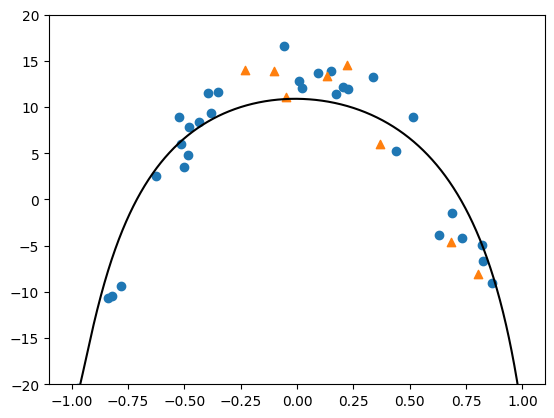

Polynomial coefficients
[10.895093626607927, -0.21156331524111438, -14.49745447917008, 0.584271895409957, -8.96151116205564, 0.8899038085572022, -5.340651446425005, 0.7326856772555097, -3.2008399148498805, 0.4772388438797992, -1.9201975066459995, 0.24789597062261673, -1.1362931650068353, 0.07441777635241442, -0.647440613633631, -0.04558791064966994, -0.3387885532589508, -0.12328861909026984, -0.14279605868051826, -0.1702623311454885, -0.018544822906490788, -0.19598415630780525, 0.059382984257494276, -0.20749238034488515, 0.10710051957219602, -0.20975559737379734, 0.13498941631891925, -0.20617522698791968, 0.14982501578359325, -0.19903207191599587, 0.15607408335531447, -0.18983154706078387, 0.15670472317598239, -0.1795535331806537, 0.1537009959603059, -0.1688266953194103, 0.14839474416594073, -0.1580474148761397, 0.1416821577995771, -0.14745976104866948, 0.1341665476539386, -0.13720872585056443, 0.12625327325091917, -0.12737539813318383, 0.11821331883974179, -0.11800006511732408, 0.1102

In [45]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [46]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.046806,11.139395,16.475553,10.718475,10.873132
1,-0.230198,14.057973,52.579327,9.534454,10.141847
2,-0.104061,13.890626,16.366202,10.517149,10.758394
3,0.684920,-4.588770,-294.045236,-0.164347,1.604060
4,0.367968,6.014162,25.479403,7.613704,8.711409
5,0.804332,-8.036859,-24959.678504,-4.309193,-3.910352
6,0.135021,13.415138,14.070591,10.344624,10.600695
7,0.221774,14.540743,12.047878,9.623192,10.119674


### Real Example (Predict fuel efficiency)

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [48]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [49]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [50]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [51]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3063.6045751243123


##### lasso regularization

In [52]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [53]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.21099778292055
